<h3>Подключение необходимых библиотек и модулей</h3>

In [ ]:
from collections import Counter

from nltk.tokenize import word_tokenize
import pandas as pd

from plots import plot_bar, plot_hist_with_kde, plot_wordcloud
from processing import text_preprocessing

<h3>Загрузка данных из Parquet</h3>

In [2]:
df = pd.read_parquet("train-00000-of-00001.parquet")
df

,title,text,topic,labels
0,"Два немца стали кандидатами в тренеры ""Динамо""",Два немецких футбольных тренера стали кандидат...,Спорт,1
1,Россия добавит тяги китайским истребителям,"Российские турбореактивные двигатели РД-93, пр...",Наука и техника,2
2,«Газпром» пересмотрел планы по строительству «...,«Газпром» сократил протяженность участка газоп...,Бизнес,4
3,"Российские зрители не услышат, как поет Ричард...",\nНа экраны российских кинотеатров выходит оди...,Культура,3
4,Призовой фонд Australian Open-2013 достиг реко...,Организаторы Открытого чемпионата Австралии по...,Спорт,1
...,...,...,...,...
185967,Суд отказался рассматривать иск по тарифам МПС,Арбитражный суд Москвы не принял к рассмотрени...,Экономика,0
185968,Мнение Михалкова о Ельцин-центре испортилось п...,"Режиссер Никита Михалков выразил сожаление, чт...",Культура,3
185969,"Российские страховщики увеличили активы до 1,6...",Активы российских страховщиков в 2015 году выр...,Экономика,0
185970,Украина введет ответное продэмбарго против России,"Премьер-министр Украины Арсений Яценюк заявил,...",Экономика,0


<h3>Удаление дубликатов</h3>

In [55]:
df = df.drop_duplicates()
df = df.drop(columns=["labels"])
df

,title,text,topic,title_preprocessed
0,"Два немца стали кандидатами в тренеры ""Динамо""",Два немецких футбольных тренера стали кандидат...,Спорт,немец стать кандидат тренер динамо
1,Россия добавит тяги китайским истребителям,"Российские турбореактивные двигатели РД-93, пр...",Наука и техника,россия добавить тяга китайский истребитель
2,«Газпром» пересмотрел планы по строительству «...,«Газпром» сократил протяженность участка газоп...,Бизнес,газпром пересмотреть план строительство сила с...
3,"Российские зрители не услышат, как поет Ричард...",\nНа экраны российских кинотеатров выходит оди...,Культура,российский зритель услышать петь ричард гир
4,Призовой фонд Australian Open-2013 достиг реко...,Организаторы Открытого чемпионата Австралии по...,Спорт,призовой фонд australian open достигнуть рекор...
...,...,...,...,...
185967,Суд отказался рассматривать иск по тарифам МПС,Арбитражный суд Москвы не принял к рассмотрени...,Экономика,суд отказаться рассматривать иск тариф мпс
185968,Мнение Михалкова о Ельцин-центре испортилось п...,"Режиссер Никита Михалков выразил сожаление, чт...",Культура,мнение михалков ельцин центр испортиться посещ...
185969,"Российские страховщики увеличили активы до 1,6...",Активы российских страховщиков в 2015 году выр...,Экономика,российский страховщик увеличить актив триллион...
185970,Украина введет ответное продэмбарго против России,"Премьер-министр Украины Арсений Яценюк заявил,...",Экономика,украина ввести ответный продэмбарго против россия


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185954 entries, 0 to 185971
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   title               185954 non-null  object
 1   text                185954 non-null  object
 2   topic               185954 non-null  object
 3   title_preprocessed  185954 non-null  object
dtypes: object(4)
memory usage: 7.1+ MB


In [57]:
df["topic"].value_counts()

topic
Экономика          57233
Спорт              46430
Культура           38798
Наука и техника    38150
Бизнес              5343
Name: count, dtype: int64

<h3>В данных есть дисбаланс классов</h3>

<h2>Анализ заголовков</h2>

In [ ]:
df["title_preprocessed"] = text_preprocessing(df["title"])

In [58]:
df["title_preprocessed_len"] = df["title_preprocessed"].str.len()
df["title_preprocessed_len"]

0         34
1         42
2         51
3         43
4         58
          ..
185967    42
185968    50
185969    56
185970    49
185971    43
Name: title_preprocessed_len, Length: 185954, dtype: int64

In [59]:
df["title_preprocessed_len"].describe().round()

count    185954.0
mean         48.0
std          11.0
min           5.0
25%          41.0
50%          48.0
75%          56.0
max         106.0
Name: title_preprocessed_len, dtype: float64

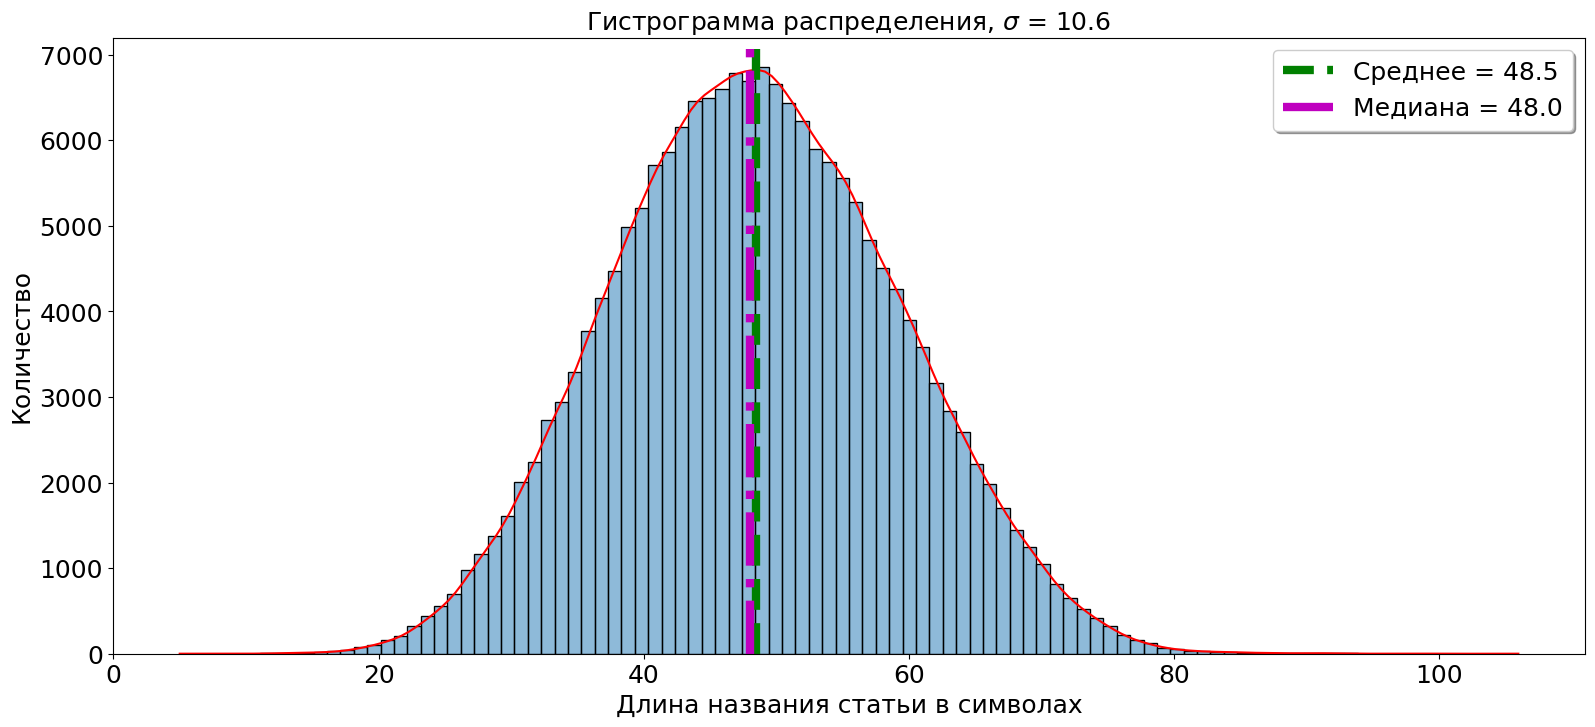

In [60]:
plot_hist_with_kde(
    df["title_preprocessed_len"], x_label="Длина названия статьи в символах"
)

<h3>Длина названия статьи в символах имеет нормальное распределение - симметрично относительно среднего, среднее и медиана примерно равны и т.д.</h3>

In [61]:
df["title_preprocessed_tokenized"] = df["title_preprocessed"].apply(
    lambda token: word_tokenize(token, language="russian")
)

In [62]:
df["title_preprocessed_tokenized_len"] = df["title_preprocessed_tokenized"].apply(len)
df["title_preprocessed_tokenized_len"]

0         5
1         5
2         6
3         6
4         7
         ..
185967    6
185968    6
185969    7
185970    6
185971    5
Name: title_preprocessed_tokenized_len, Length: 185954, dtype: int64

In [63]:
token_counter = Counter()

for tokens_list in df["title_preprocessed_tokenized"]:
    if isinstance(tokens_list, list) and tokens_list:
        token_counter.update(tokens_list)

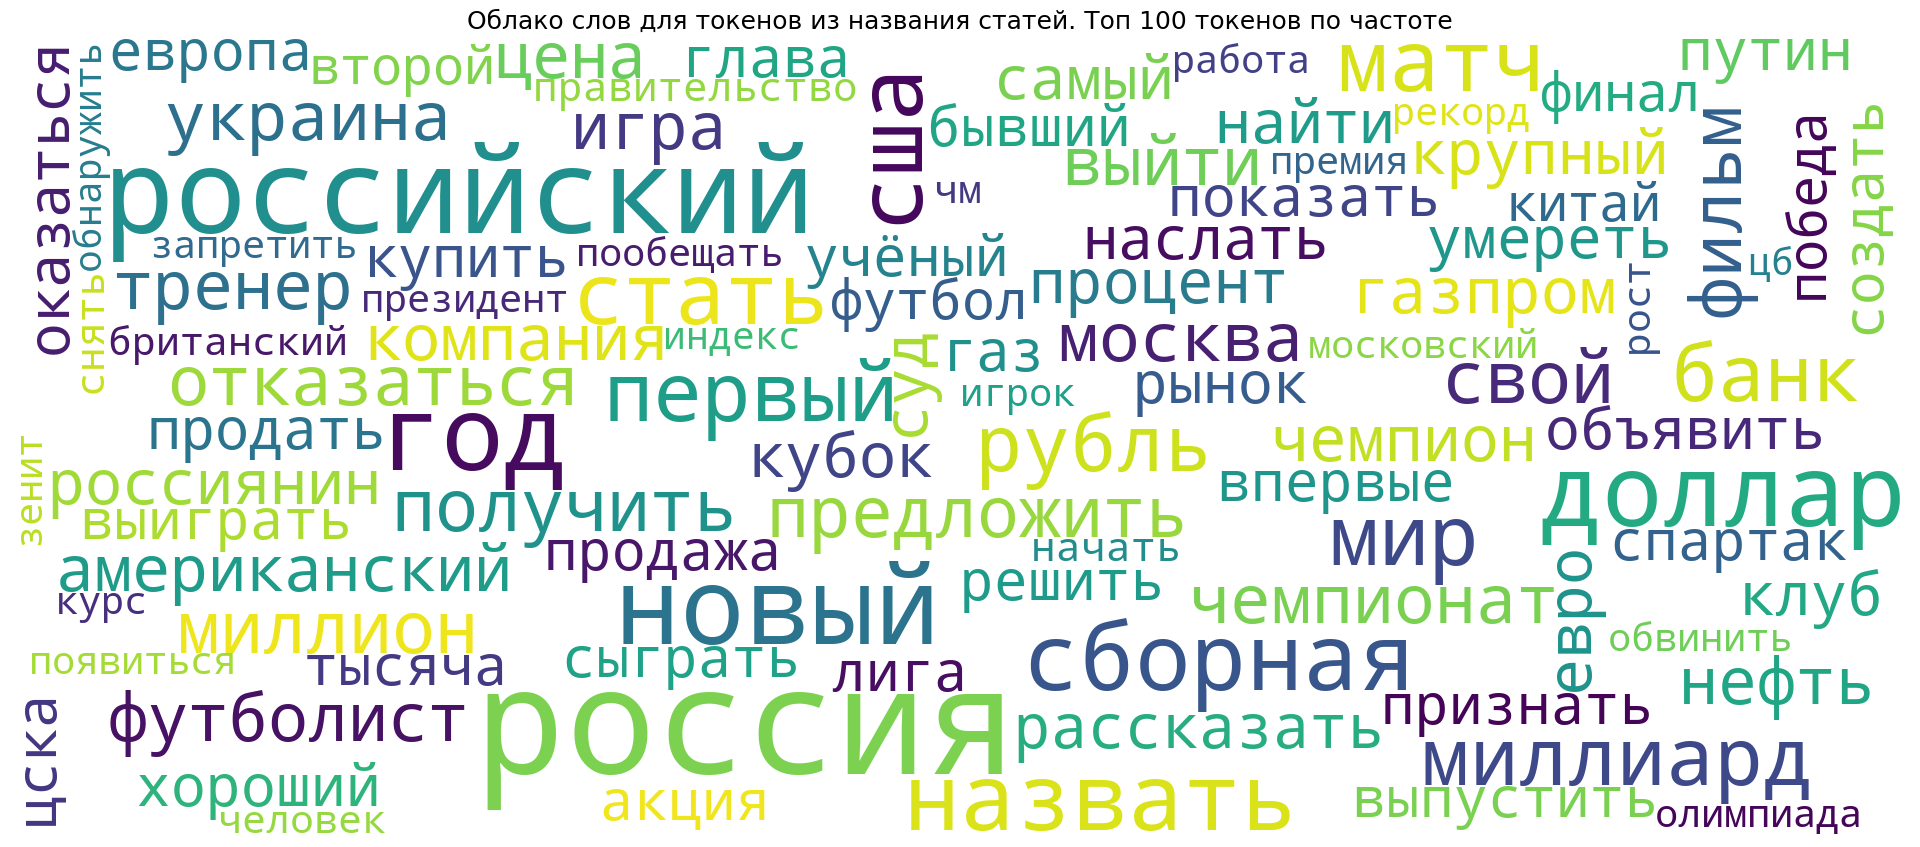

In [64]:
plot_wordcloud(
    token_counter,
    plot_title="Облако слов для токенов из названия статей. Топ 100 токенов по частоте",
)

<h3>Много статей посвящены России, что очевидно</h3>

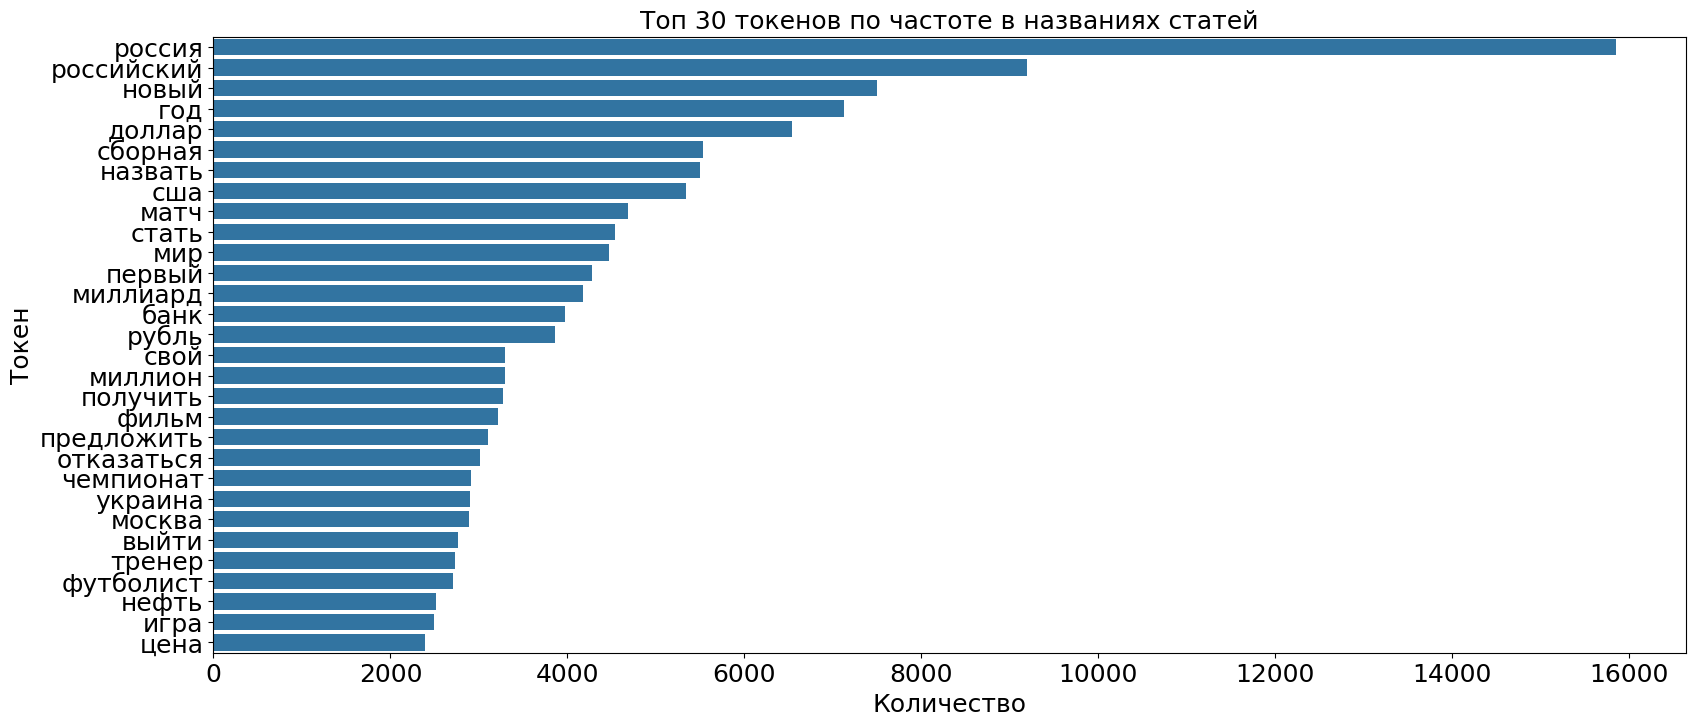

In [ ]:
plot_bar(
    token_counter,
    plot_title="Топ 30 токенов по частоте в названиях статей",
    y_label="Токен",
)